# Perform clustering (hierarchical,K means clustering and DBSCAN)  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [4]:
airline = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
airline1 = airline.drop(['ID#'],axis=1)
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = pd.DataFrame(trans.fit_transform(airline1.iloc[:,1:]))
data.head()   

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


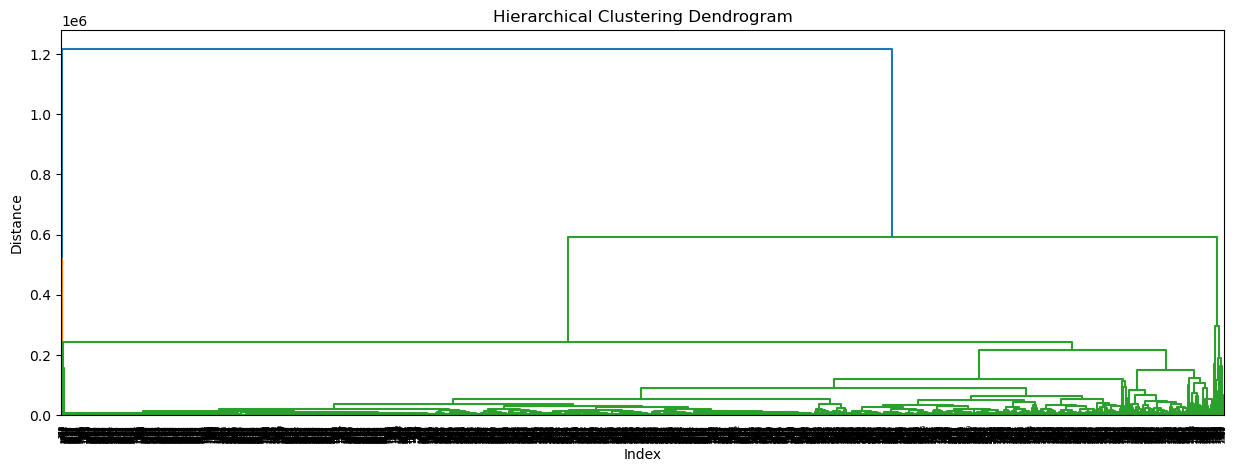

In [8]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
z = linkage(airline1, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
)
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering #hierarchical clustering
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(airline1) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airline['clust']=cluster_labels # creating a  new column and assigning it to new column 
airline  

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [10]:
airline.iloc[:,1:].groupby(airline.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,6.722714e+04,139.818733,2.045948,1.014643,1.011613,16728.605403,11.501641,447.726837,1.329462,4095.145923,0.365817,0.0
1,1.184935e+06,1910.000000,3.500000,1.000000,1.000000,44595.500000,22.750000,2237.500000,8.500000,7956.250000,0.750000,1.0
2,6.125255e+05,493.857143,3.571429,1.000000,1.107143,58403.392857,22.285714,1656.928571,5.428571,6409.535714,0.821429,2.0
3,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.000000,3.0
4,8.899450e+05,204.800000,3.400000,1.000000,1.000000,93889.800000,18.200000,1230.000000,3.600000,6134.200000,1.000000,4.0


In [11]:
data = airline[(airline.clust==1)]
data   

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,1
466,472,1113394,2015,5,1,1,60883,26,2600,9,8228,1,1
481,487,1125076,0,3,1,1,23046,14,0,0,8107,0,1
488,494,1199220,2919,1,1,1,3800,19,3300,18,8023,1,1


In [12]:
data = airline[(airline.clust==0)]
data   

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [13]:
data = airline[(airline.clust==2)]
data   

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
43,44,619393,0,3,1,1,15008,14,0,0,7819,1,2
72,74,550367,0,3,1,1,12500,13,50,1,7801,0,2
87,90,609477,0,3,1,1,21422,22,1200,8,6820,0,2
126,129,602064,0,5,1,1,194753,26,2250,10,7652,1,2
186,190,707079,0,4,1,1,57173,40,3450,12,7523,1,2
244,248,468175,0,5,1,1,141615,22,0,0,7348,1,2
290,294,568174,0,5,1,1,67121,16,1000,2,7243,1,2
313,317,714717,0,5,1,1,119162,20,1750,4,7183,1,2
318,322,766419,0,1,1,1,11398,3,398,1,7162,1,2
383,388,479989,0,4,1,1,66516,26,1600,6,6980,0,2


In [14]:
from sklearn.preprocessing import StandardScaler#standardization
scaler = StandardScaler()
airline_subset = pd.DataFrame(scaler.fit_transform(airline.iloc[:,1:7]))
airline_subset    

,0,1,2,3,4,5
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121
...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286


# Hierarchical Clustering

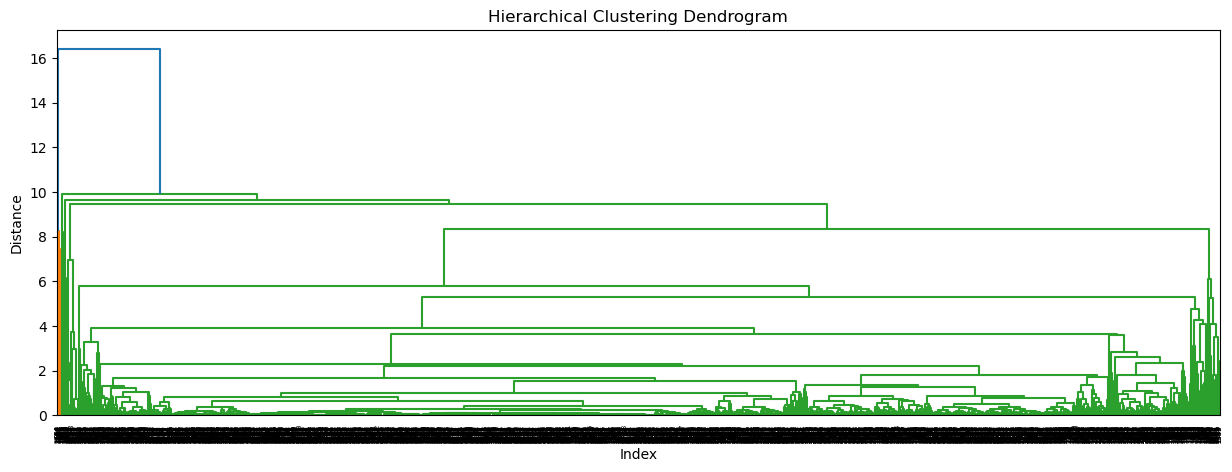

In [15]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
z = linkage(airline_subset, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
)
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(airline_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airline['clust']=cluster_labels
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [17]:
airline.iloc[:,1:].groupby(airline.clust).mean()    

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,7.028220e+04,143.213357,2.060413,1.000000,1.000765,16497.465460,11.431303,449.095590,1.331889,4107.704053,0.366811,0.0
1,1.380614e+05,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,1.0
2,1.013331e+06,1118.727273,1.909091,1.000000,1.000000,24584.090909,18.181818,2753.909091,9.909091,6888.909091,0.909091,2.0
3,3.479100e+05,0.000000,4.428571,1.000000,1.000000,218811.000000,25.142857,2145.000000,5.714286,5706.571429,1.000000,3.0
4,6.887658e+04,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,4.0


In [18]:
data = airline[(airline.clust==0)]
data  

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [19]:
data = airline[(airline.clust==1)]
data  

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,1
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,1
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,1
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,1
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,1
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,1
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,1
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,1
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,1
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,1


In [20]:
data = airline[(airline.clust==2)]
data  

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,2
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,2
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,2
318,322,766419,0,1,1,1,11398,3,398,1,7162,1,2
466,472,1113394,2015,5,1,1,60883,26,2600,9,8228,1,2
471,477,743745,2066,1,1,1,4100,20,2500,18,8228,1,2
481,487,1125076,0,3,1,1,23046,14,0,0,8107,0,2
488,494,1199220,2919,1,1,1,3800,19,3300,18,8023,1,2
1115,1127,739476,0,1,1,1,24215,8,322,1,5678,1,2
1188,1200,837979,0,1,1,1,18372,15,1450,4,5373,1,2


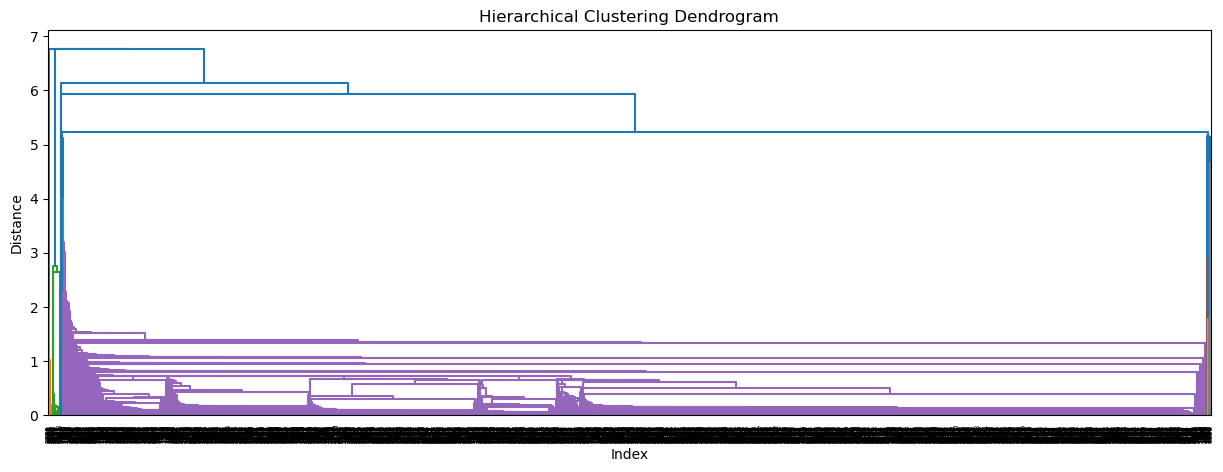

In [21]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(airline1) # converting into numpy array format 
z = linkage(airline_subset, method="single",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()    

In [22]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5, linkage='single',affinity = "euclidean").fit(airline_subset) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
airline['clust']=cluster_labels # creating a  new column and assigning it to new column 
airline 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# K-means 

In [23]:
from sklearn.cluster import KMeans

In [24]:
X = np.random.uniform(0,1,1000) #values lie bw 0 and 1
Y = np.random.uniform(0,1,1000)
X 

array([9.94357216e-01, 4.79344141e-01, 2.53013063e-01, 4.94005540e-01,
       5.02826326e-01, 6.34106679e-01, 6.60141570e-01, 3.64134294e-01,
       4.88099335e-01, 5.76917827e-01, 8.49883178e-01, 6.51269686e-01,
       8.91091460e-01, 2.62431502e-02, 4.85477992e-01, 9.31708931e-01,
       8.21965901e-01, 3.26770254e-01, 5.20448423e-01, 8.62516066e-01,
       7.96144072e-01, 3.12351520e-03, 9.71757083e-01, 4.94938034e-01,
       5.48888854e-01, 1.75998431e-01, 2.01014997e-01, 1.44188699e-02,
       5.54712266e-01, 9.29478249e-01, 5.22085725e-01, 4.03582821e-01,
       3.46101685e-01, 1.74424506e-01, 5.25037558e-01, 7.77516271e-01,
       5.88000447e-01, 9.43132580e-01, 8.85826554e-01, 1.73557181e-01,
       6.56652152e-02, 5.07262709e-01, 9.48353744e-01, 8.90287683e-01,
       3.37447965e-01, 2.08480935e-01, 6.15263661e-01, 9.01932044e-01,
       1.94734558e-01, 4.44123939e-01, 2.09268587e-01, 7.29392628e-01,
       7.92050000e-01, 7.07389551e-01, 8.13053363e-01, 1.33859869e-01,
      

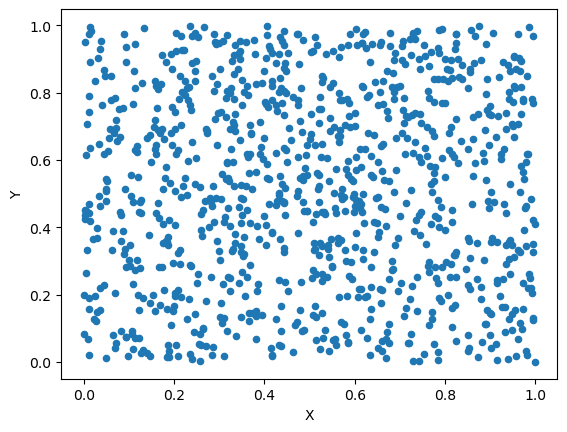

In [25]:
df_xy =pd.DataFrame(columns=["X","Y"]) # creating columns
df_xy # empty data
df_xy.X = X # inserting x columns
df_xy.Y = Y 
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)

<AxesSubplot:xlabel='X', ylabel='Y'>

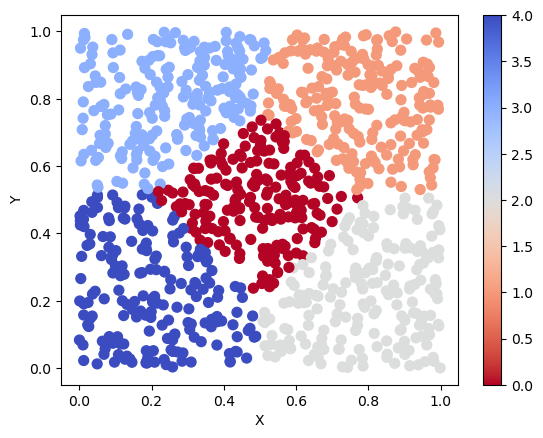

In [26]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=50,cmap=plt.cm.coolwarm_r)  

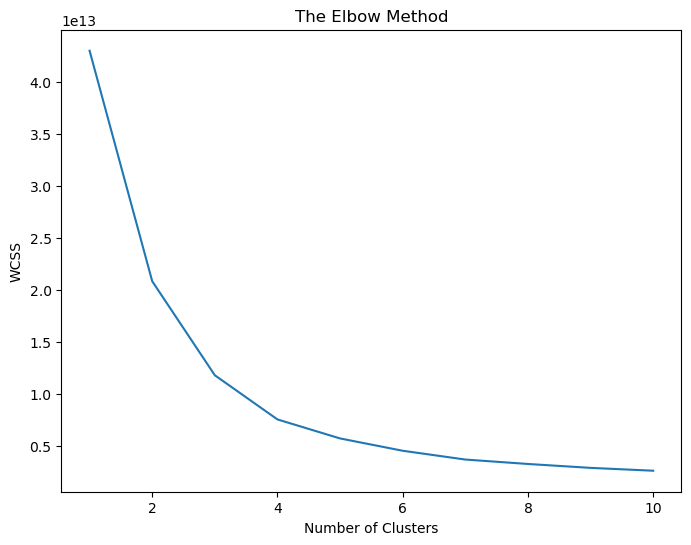

In [27]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(8, 6))
WCSS = [] # empty list to store the values
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(airline1)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [28]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(airline1)   
y_kmeans

array([1, 1, 1, ..., 3, 1, 1])

In [29]:
clf.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [30]:
clf.cluster_centers_ 

array([[2.06421154e+05, 3.00116809e+02, 3.02849003e+00, 1.00569801e+00,
        1.01424501e+00, 3.55406553e+04, 1.82136752e+01, 1.04105413e+03,
        2.91168091e+00, 5.04715100e+03, 4.90028490e-01],
       [2.59142086e+04, 9.94828560e+01, 1.55143203e+00, 1.01694232e+00,
        1.00443727e+00, 8.57692416e+03, 8.67648245e+00, 2.55536507e+02,
        7.92658330e-01, 3.73242719e+03, 3.15046390e-01],
       [9.22162526e+05, 5.64736842e+02, 3.21052632e+00, 1.00000000e+00,
        1.15789474e+00, 5.84920526e+04, 2.08947368e+01, 1.60752632e+03,
        6.26315789e+00, 6.64231579e+03, 8.94736842e-01],
       [9.69303930e+04, 1.64022620e+02, 2.80678605e+00, 1.01036758e+00,
        1.02827521e+00, 2.76313751e+04, 1.53930254e+01, 6.27327050e+02,
        1.82846371e+00, 4.51594910e+03, 4.21300660e-01],
       [4.18790180e+05, 4.44910112e+02, 3.23595506e+00, 1.03370787e+00,
        1.00000000e+00, 4.94049101e+04, 1.98314607e+01, 1.62630337e+03,
        5.02247191e+00, 5.93546067e+03, 7.19101124e-

In [31]:
clf.inertia_ 

5724809439329.195

In [32]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
airline['clust']=md # creating a  new column and assigning it to new column 
airline 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [33]:
airline.iloc[:,1:7].groupby(airline.clust).mean() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
clust,,,,,,
0,206580.362857,300.974286,3.025714,1.005714,1.014286,35517.660000
1,25924.159677,99.442742,1.552823,1.016935,1.004435,8596.936694
2,922162.526316,564.736842,3.210526,1.000000,1.157895,58492.052632
3,97024.742696,164.022620,2.805844,1.010368,1.028275,27617.596607
4,418790.179775,444.910112,3.235955,1.033708,1.000000,49404.910112


Text(0.5, 1.0, 'Clusters using KMeans')

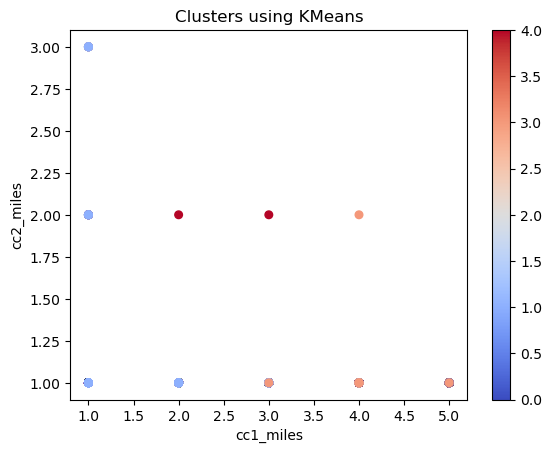

In [34]:
airline.plot(x = "cc1_miles", y = "cc2_miles", c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')    

In [35]:
WCSS

[42961820046587.05,
 20823632642041.96,
 11790841556810.334,
 7549630961801.501,
 5724556335991.397,
 4541450673874.507,
 3697460312952.419,
 3272389906647.461,
 2897498733467.7983,
 2624322049841.3916]

# Db scan 

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    

In [37]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [39]:
df1 = df.drop(['ID#'], axis=1)
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [40]:
array = df1.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [41]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X   

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [42]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=4)

In [43]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [44]:
df['clusters'] = dbscan.labels_
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


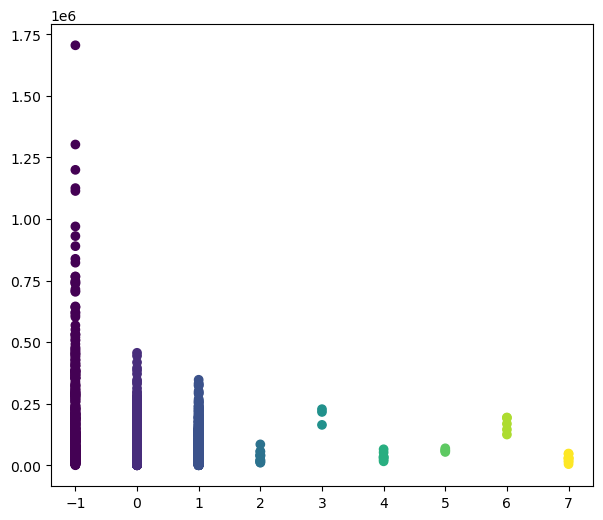

In [45]:
plt.figure(figsize=(7, 6))  
plt.scatter(df['clusters'],df['Balance'], c=dbscan.labels_) 

In [46]:
import sklearn
sklearn.metrics.silhouette_score(X, y_kmeans)

0.1305599673597761

In [47]:
from sklearn.neighbors import NearestNeighbors  

In [48]:
neigh = NearestNeighbors(n_neighbors=22)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)  

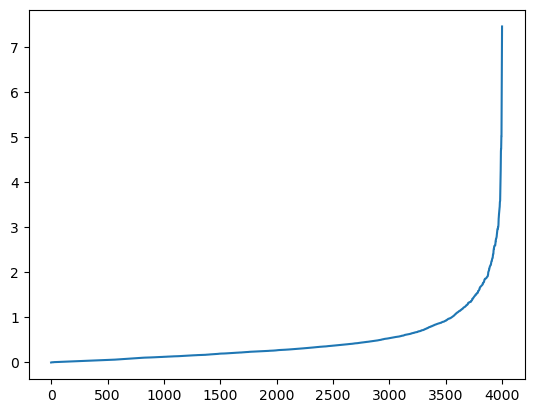

In [49]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  